In [1]:
print('assignment01 for GitJobish03 and edited in git, and 18')

assignment01 for GitJobish03 and edited in git, and 18


In [2]:
import numpy as np
a=[1,2,3,4,5]


In [3]:
x = np.array(a)

1.  Find the type of `x` using the function `type()`.*texto en cursiva*


In [4]:
type(x)

numpy.ndarray

2.  Find the shape of the array:


In [5]:
x.shape

(5,)

3.  Find the type of data in the array:


In [6]:
x.dtype

dtype('int64')

4.  Find the mean of the array:


In [7]:
x.mean()

3.0

In [8]:
import numpy as np
A=np.array([[11,12],[21,22],[31,32]])

1.  Find the type of `x` using the function `type()`.


In [9]:
type(A)

numpy.ndarray

2.  Find the shape of the array:


In [10]:
A.shape

(3, 2)

3.  Find the type of data in the array:


In [11]:
A.dtype

dtype('int64')

4.  Find the second row of the numpy array <code>A</code>:


In [12]:
A[1]

array([21, 22])

<h3>Two Types of Multiplication</h3>


You will use the following numpy arrays for the next questions:


In [13]:
A=np.array([[11,12],[21,22]])
B=np.array([[1, 0],[0,1]])

1.  Multiply array <code>A</code> and <code>B</code>.


In [14]:
C = A * B
C

array([[11,  0],
       [ 0, 22]])

2. Perform matrix multiplication on array A and B (order will not matter in this case).

In [15]:
Z = np.dot(A,B)
Z

array([[11, 12],
       [21, 22]])

Beautiful Soup Object
Tag
Children, Parents, and Siblings
HTML Attributes
Navigable String
Filter
find All
find
HTML Attributes
Navigable String
Downloading And Scraping The Contents Of A Web

For this lab, we are going to be using Python and several Python libraries. Some of these libraries might be installed in your lab environment or in SN Labs. Others may need to be installed by you. The cells below will install these libraries when executed.

In [16]:
!pip install bs4
#!pip install requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Import the required modules and functions

In [17]:
from bs4 import BeautifulSoup # this module helps in web scrapping.
import requests  # this module helps us to download a web page

Beautiful Soup Objects
Beautiful Soup is a Python library for pulling data out of HTML and XML files, we will focus on HTML files. This is accomplished by representing the HTML as a set of objects with methods used to parse the HTML. We can navigate the HTML as a tree, and/or filter out what we are looking for.

Consider the following HTML:

In [18]:
%%html
<!DOCTYPE html>
<html>
<head>
<title>Page Title</title>
</head>
<body>
<h3><b id='boldest'>Lebron James</b></h3>
<p> Salary: $ 92,000,000 </p>
<h3> Stephen Curry</h3>
<p> Salary: $85,000, 000 </p>
<h3> Kevin Durant </h3>
<p> Salary: $73,200, 000</p>
</body>
</html>

We can store it as a string in the variable HTML:

In [19]:
html="<!DOCTYPE html><html><head><title>Page Title</title></head><body><h3><b id='boldest'>Lebron James</b></h3><p> Salary: $ 92,000,000 </p><h3> Stephen Curry</h3><p> Salary: $85,000, 000 </p><h3> Kevin Durant </h3><p> Salary: $73,200, 000</p></body></html>"

To parse a document, pass it into the BeautifulSoup constructor. The BeautifulSoup object represents the document as a nested data structure:

In [20]:
soup = BeautifulSoup(html, 'html5lib')

First, the document is converted to Unicode (similar to ASCII) and HTML entities are converted to Unicode characters. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. The BeautifulSoup object can create other types of objects. In this lab, we will cover BeautifulSoup and Tag objects, that for the purposes of this lab are identical. Finally, we will look at NavigableString objects.

We can use the method <code>prettify()</code> to display the HTML in the nested structure:


In [21]:
print(soup.prettify())

<!DOCTYPE html>
<html>
 <head>
  <title>
   Page Title
  </title>
 </head>
 <body>
  <h3>
   <b id="boldest">
    Lebron James
   </b>
  </h3>
  <p>
   Salary: $ 92,000,000
  </p>
  <h3>
   Stephen Curry
  </h3>
  <p>
   Salary: $85,000, 000
  </p>
  <h3>
   Kevin Durant
  </h3>
  <p>
   Salary: $73,200, 000
  </p>
 </body>
</html>


Tags
Let's say we want the title of the page and the name of the top paid player. We can use the Tag. The Tag object corresponds to an HTML tag in the original document, for example, the tag title.

In [22]:
tag_object=soup.title
print("tag object:",tag_object)

tag object: <title>Page Title</title>


we can see the tag type bs4.element.Tag

In [23]:
print("tag object type:",type(tag_object))

tag object type: <class 'bs4.element.Tag'>


If there is more than one Tag with the same name, the first element with that Tag name is called. This corresponds to the most paid player:

In [24]:
tag_object=soup.h3
tag_object

<h3><b id="boldest">Lebron James</b></h3>

Enclosed in the bold attribute b, it helps to use the tree representation. We can navigate down the tree using the child attribute to get the name.

Children, Parents, and Siblings
As stated above, the Tag object is a tree of objects. We can access the child of the tag or navigate down the branch as follows:

In [25]:
tag_child =tag_object.b
tag_child

<b id="boldest">Lebron James</b>

You can access the parent with the  parent

In [26]:
parent_tag=tag_child.parent
parent_tag

<h3><b id="boldest">Lebron James</b></h3>

this is identical to:

In [27]:
tag_object

<h3><b id="boldest">Lebron James</b></h3>

tag_object parent is the body element.

In [28]:
tag_object.parent

<body><h3><b id="boldest">Lebron James</b></h3><p> Salary: $ 92,000,000 </p><h3> Stephen Curry</h3><p> Salary: $85,000, 000 </p><h3> Kevin Durant </h3><p> Salary: $73,200, 000</p></body>

tag_object sibling is the paragraph element

In [29]:
sibling_1=tag_object.next_sibling
sibling_1

<p> Salary: $ 92,000,000 </p>

sibling_2 is the header element, which is also a sibling of both sibling_1 and tag_object

In [30]:
sibling_2=sibling_1.next_sibling
sibling_2

<h3> Stephen Curry</h3>

Exercise: next_sibling
Use the object sibling_2 and the method next_sibling to find the salary of Stephen Curry:

In [31]:
sibling_2.next_sibling

<p> Salary: $85,000, 000 </p>

HTML Attributes
If the tag has attributes, the tag id="boldest" has an attribute id whose value is boldest. You can access a tag’s attributes by treating the tag like a dictionary:

In [32]:
tag_child['id']

'boldest'

You can access that dictionary directly as attrs:

In [33]:
tag_child.attrs

{'id': 'boldest'}

You can also work with Multi-valued attributes. Check out [1] for more.

We can also obtain the content of the attribute of the tag using the Python get() method.

In [34]:
tag_child.get('id')

'boldest'

Navigable String
A string corresponds to a bit of text or content within a tag. Beautiful Soup uses the NavigableString class to contain this text. In our HTML we can obtain the name of the first player by extracting the string of the Tag object tag_child as follows:

In [35]:
tag_string=tag_child.string
tag_string

'Lebron James'

we can verify the type is Navigable String

In [36]:
type(tag_string)

bs4.element.NavigableString

A NavigableString is similar to a Python string or Unicode string. To be more precise, the main difference is that it also supports some BeautifulSoup features. We can convert it to string object in Python:

In [37]:
unicode_string = str(tag_string)
unicode_string

'Lebron James'

Filter
Filters allow you to find complex patterns, the simplest filter is a string. In this section we will pass a string to a different filter method and Beautiful Soup will perform a match against that exact string. Consider the following HTML of rocket launches:

In [38]:
%%html
<table>
  <tr>
    <td id='flight' >Flight No</td>
    <td>Launch site</td> 
    <td>Payload mass</td>
   </tr>
  <tr> 
    <td>1</td>
    <td><a href='https://en.wikipedia.org/wiki/Florida'>Florida</a></td>
    <td>300 kg</td>
  </tr>
  <tr>
    <td>2</td>
    <td><a href='https://en.wikipedia.org/wiki/Texas'>Texas</a></td>
    <td>94 kg</td>
  </tr>
  <tr>
    <td>3</td>
    <td><a href='https://en.wikipedia.org/wiki/Florida'>Florida<a> </td>
    <td>80 kg</td>
  </tr>
</table>

Flight No,Launch site,Payload mass
1,Florida,300 kg
2,Texas,94 kg
3,Florida,80 kg


We can store it as a string in the variable table:

In [39]:
table="<table><tr><td id='flight'>Flight No</td><td>Launch site</td> <td>Payload mass</td></tr><tr> <td>1</td><td><a href='https://en.wikipedia.org/wiki/Florida'>Florida<a></td><td>300 kg</td></tr><tr><td>2</td><td><a href='https://en.wikipedia.org/wiki/Texas'>Texas</a></td><td>94 kg</td></tr><tr><td>3</td><td><a href='https://en.wikipedia.org/wiki/Florida'>Florida<a> </td><td>80 kg</td></tr></table>"

In [40]:
table_bs = BeautifulSoup(table, 'html5lib')

find All
The find_all() method looks through a tag’s descendants and retrieves all descendants that match your filters.

The Method signature for find_all(name, attrs, recursive, string, limit, **kwargs)

Name
When we set the name parameter to a tag name, the method will extract all the tags with that name and its children.

In [41]:
table_rows=table_bs.find_all('tr')
table_rows

[<tr><td id="flight">Flight No</td><td>Launch site</td> <td>Payload mass</td></tr>,
 <tr> <td>1</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a><a></a></td><td>300 kg</td></tr>,
 <tr><td>2</td><td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td><td>94 kg</td></tr>,
 <tr><td>3</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a><a> </a></td><td>80 kg</td></tr>]

The result is a Python Iterable just like a list, each element is a <code>tag</code> object:


In [42]:
first_row =table_rows[0]
first_row

<tr><td id="flight">Flight No</td><td>Launch site</td> <td>Payload mass</td></tr>

The type is tag

In [43]:
print(type(first_row))

<class 'bs4.element.Tag'>


we can obtain the child

In [44]:
first_row.td

<td id="flight">Flight No</td>

If we iterate through the list, each element corresponds to a row in the table:

In [45]:
for i,row in enumerate(table_rows):
    print("row",i,"is",row)
    

row 0 is <tr><td id="flight">Flight No</td><td>Launch site</td> <td>Payload mass</td></tr>
row 1 is <tr> <td>1</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a><a></a></td><td>300 kg</td></tr>
row 2 is <tr><td>2</td><td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td><td>94 kg</td></tr>
row 3 is <tr><td>3</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a><a> </a></td><td>80 kg</td></tr>


As row is a cell object, we can apply the method find_all to it and extract table cells in the object cells using the tag td, this is all the children with the name td. The result is a list, each element corresponds to a cell and is a Tag object, we can iterate through this list as well. We can extract the content using the string attribute.

In [46]:
for i,row in enumerate(table_rows):
    print("row",i)
    cells=row.find_all('td')
    for j,cell in enumerate(cells):
        print('colunm',j,"cell",cell)

row 0
colunm 0 cell <td id="flight">Flight No</td>
colunm 1 cell <td>Launch site</td>
colunm 2 cell <td>Payload mass</td>
row 1
colunm 0 cell <td>1</td>
colunm 1 cell <td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a><a></a></td>
colunm 2 cell <td>300 kg</td>
row 2
colunm 0 cell <td>2</td>
colunm 1 cell <td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td>
colunm 2 cell <td>94 kg</td>
row 3
colunm 0 cell <td>3</td>
colunm 1 cell <td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a><a> </a></td>
colunm 2 cell <td>80 kg</td>


If we use a list we can match against any item in that list.

In [47]:
list_input=table_bs .find_all(name=["tr", "td"])
list_input

[<tr><td id="flight">Flight No</td><td>Launch site</td> <td>Payload mass</td></tr>,
 <td id="flight">Flight No</td>,
 <td>Launch site</td>,
 <td>Payload mass</td>,
 <tr> <td>1</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a><a></a></td><td>300 kg</td></tr>,
 <td>1</td>,
 <td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a><a></a></td>,
 <td>300 kg</td>,
 <tr><td>2</td><td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td><td>94 kg</td></tr>,
 <td>2</td>,
 <td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td>,
 <td>94 kg</td>,
 <tr><td>3</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a><a> </a></td><td>80 kg</td></tr>,
 <td>3</td>,
 <td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a><a> </a></td>,
 <td>80 kg</td>]

Attributes
If the argument is not recognized it will be turned into a filter on the tag’s attributes. For example with the id argument, Beautiful Soup will filter against each tag’s id attribute. For example, the first td elements have a value of id of flight, therefore we can filter based on that id value.

In [48]:
table_bs.find_all(id="flight")

[<td id="flight">Flight No</td>]

Attributes
If the argument is not recognized it will be turned into a filter on the tag’s attributes. For example with the id argument, Beautiful Soup will filter against each tag’s id attribute. For example, the first td elements have a value of id of flight, therefore we can filter based on that id value.

In [49]:
table_bs.find_all(id="flight")

[<td id="flight">Flight No</td>]

We can find all the elements that have links to the Florida Wikipedia page:

In [50]:
list_input=table_bs.find_all(href="https://en.wikipedia.org/wiki/Florida")
list_input

[<a href="https://en.wikipedia.org/wiki/Florida">Florida</a>,
 <a href="https://en.wikipedia.org/wiki/Florida">Florida</a>]

If we set the href attribute to True, regardless of what the value is, the code finds all tags with href value:

In [51]:
table_bs.find_all(href=True)

[<a href="https://en.wikipedia.org/wiki/Florida">Florida</a>,
 <a href="https://en.wikipedia.org/wiki/Texas">Texas</a>,
 <a href="https://en.wikipedia.org/wiki/Florida">Florida</a>]

Exercise: find_all
Using the logic above, find all the elements without href value

In [52]:
table_bs.find_all(href=False)

[<html><head></head><body><table><tbody><tr><td id="flight">Flight No</td><td>Launch site</td> <td>Payload mass</td></tr><tr> <td>1</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a><a></a></td><td>300 kg</td></tr><tr><td>2</td><td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td><td>94 kg</td></tr><tr><td>3</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a><a> </a></td><td>80 kg</td></tr></tbody></table></body></html>,
 <head></head>,
 <body><table><tbody><tr><td id="flight">Flight No</td><td>Launch site</td> <td>Payload mass</td></tr><tr> <td>1</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a><a></a></td><td>300 kg</td></tr><tr><td>2</td><td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td><td>94 kg</td></tr><tr><td>3</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a><a> </a></td><td>80 kg</td></tr></tbody></table></body>,
 <table><tbody><tr><td id="flight">Flight No</td><td>Launch site</td> <t

Using the soup object soup, find the element with the id attribute content set to "boldest".

In [53]:
soup.find_all(id="boldest")

[<b id="boldest">Lebron James</b>]

string
With string you can search for strings instead of tags, where we find all the elments with Florida:

In [54]:
table_bs.find_all(string="Florida")

['Florida', 'Florida']

find
The find_all() method scans the entire document looking for results. It’s useful if you are looking for one element, as you can use the find() method to find the first element in the document. Consider the following two tables:

In [55]:
%%html
<h3>Rocket Launch </h3>

<p>
<table class='rocket'>
  <tr>
    <td>Flight No</td>
    <td>Launch site</td> 
    <td>Payload mass</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Florida</td>
    <td>300 kg</td>
  </tr>
  <tr>
    <td>2</td>
    <td>Texas</td>
    <td>94 kg</td>
  </tr>
  <tr>
    <td>3</td>
    <td>Florida </td>
    <td>80 kg</td>
  </tr>
</table>
</p>
<p>

<h3>Pizza Party  </h3>
  
    
<table class='pizza'>
  <tr>
    <td>Pizza Place</td>
    <td>Orders</td> 
    <td>Slices </td>
   </tr>
  <tr>
    <td>Domino's Pizza</td>
    <td>10</td>
    <td>100</td>
  </tr>
  <tr>
    <td>Little Caesars</td>
    <td>12</td>
    <td >144 </td>
  </tr>
  <tr>
    <td>Papa John's </td>
    <td>15 </td>
    <td>165</td>
  </tr>

Flight No,Launch site,Payload mass
1,Florida,300 kg
2,Texas,94 kg
3,Florida,80 kg
Pizza Place,Orders,Slices
Domino's Pizza,10,100
Little Caesars,12,144
Papa John's,15,165


We store the HTML as a Python string and assign two_tables:

In [56]:
two_tables="<h3>Rocket Launch </h3><p><table class='rocket'><tr><td>Flight No</td><td>Launch site</td> <td>Payload mass</td></tr><tr><td>1</td><td>Florida</td><td>300 kg</td></tr><tr><td>2</td><td>Texas</td><td>94 kg</td></tr><tr><td>3</td><td>Florida </td><td>80 kg</td></tr></table></p><p><h3>Pizza Party  </h3><table class='pizza'><tr><td>Pizza Place</td><td>Orders</td> <td>Slices </td></tr><tr><td>Domino's Pizza</td><td>10</td><td>100</td></tr><tr><td>Little Caesars</td><td>12</td><td >144 </td></tr><tr><td>Papa John's </td><td>15 </td><td>165</td></tr>"

We create a BeautifulSoup object two_tables_bs

In [57]:
two_tables_bs= BeautifulSoup(two_tables, 'html.parser')

We can find the first table using the tag name table

In [58]:
two_tables_bs.find("table")

<table class="rocket"><tr><td>Flight No</td><td>Launch site</td> <td>Payload mass</td></tr><tr><td>1</td><td>Florida</td><td>300 kg</td></tr><tr><td>2</td><td>Texas</td><td>94 kg</td></tr><tr><td>3</td><td>Florida </td><td>80 kg</td></tr></table>

We can filter on the class attribute to find the second table, but because class is a keyword in Python, we add an underscore to differentiate them.

In [59]:
two_tables_bs.find("table",class_='pizza')

<table class="pizza"><tr><td>Pizza Place</td><td>Orders</td> <td>Slices </td></tr><tr><td>Domino's Pizza</td><td>10</td><td>100</td></tr><tr><td>Little Caesars</td><td>12</td><td>144 </td></tr><tr><td>Papa John's </td><td>15 </td><td>165</td></tr></table>

Downloading And Scraping The Contents Of A Web Page
We Download the contents of the web page:

In [60]:
url = "http://www.ibm.com"

We use get to download the contents of the webpage in text format and store in a variable called data:

In [61]:
data  = requests.get(url).text 

We create a BeautifulSoup object using the BeautifulSoup constructor

In [62]:
soup = BeautifulSoup(data,"html5lib")  # create a soup object using the variable 'data'

Scrape all links

In [63]:
for link in soup.find_all('a',href=True):  # in html anchor/link is represented by the tag <a>

    print(link.get('href'))


#main-content
http://www.ibm.com
https://www.ibm.com/resources/guides/business-operations/sustainability-core-business-strategy?lnk=ushpv18l1
#ibm-hp--tech-section
https://www.ibm.com/consulting/?lnk=ushpv18intro2
https://www.ibm.com/cloud/blog/announcements/introducing-global-replication-service-on-ibm-power-systems-virtual-server?lnk=ushpv18f1
https://www.ibm.com/thought-leadership/smart/talks/?lnk=ushpv18f2
https://www.ibm.com/thought-leadership/institute-business-value/en-us/report/transformation-index?lnk=ushpv18f3
https://www.ibm.com/blogs/internet-of-things/what-keeps-a-cio-up-at-night/?lnk=ushpv18f4
https://research.ibm.com/blog/quantum-safe-crypto-for-telco?lnk=ushpv18r1
https://research.ibm.com/blog/quantum-safe-crypto-for-telco?lnk=ushpv18r1
https://research.ibm.com/blog/AI-updated-virtual-agent?lnk=ushpv18r2
https://research.ibm.com/blog/2023-quantum-internships?lnk=ushpv18r3
https://research.ibm.com/blog/what-is-synthetic-data?lnk=ushpv18r4
https://www.ibm.com/case-studies

Scrape all images Tags¶

In [64]:
for link in soup.find_all('img'):# in html image is represented by the tag <img>
    print(link)
    print(link.get('src'))


data:image/svg+xml;base64,PHN2ZyB3aWR0aD0iMTA1NSIgaGVpZ2h0PSI1MjcuNSIgeG1sbnM9Imh0dHA6Ly93d3cudzMub3JnLzIwMDAvc3ZnIiB2ZXJzaW9uPSIxLjEiLz4=
<img alt="abstract line drawing of a girl, some trees, a farmhouse and the sun shining overhead" class="ibm-resize" decoding="async" src="https://1.dam.s81c.com/p/08f951362fa700ec/20220926-ls-sustainability-smart-paper-26988-720x360.png" style="position:absolute;top:0;left:0;bottom:0;right:0;box-sizing:border-box;padding:0;border:none;margin:auto;display:block;width:0;height:0;min-width:100%;max-width:100%;min-height:100%;max-height:100%"/>
https://1.dam.s81c.com/p/08f951362fa700ec/20220926-ls-sustainability-smart-paper-26988-720x360.png
<img alt="woman wearing a headset working in a mainframe room" class="bx--image__img bx--card__img" src="https://1.dam.s81c.com/p/08a56f9a98c62385/2022-Slowell_Inside-IBM_POWER10_Lifestyle_Lab-0787.jpg.global.s_4x3.jpg"/>
https://1.dam.s81c.com/p/08a56f9a98c62385/2022-Slowell_Inside-IBM_POWER10_Lifestyle_Lab-0787.j

### Scrape data from HTML tables

In [65]:
#The below url contains an html table with data about colors and color codes.
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/HTMLColorCodes.html"

Before proceeding to scrape a web site, you need to examine the contents and the way data is organized on the website. Open the above url in your browser and check how many rows and columns there are in the color table.

In [66]:
# get the contents of the webpage in text format and store in a variable called data
data  = requests.get(url).text

In [67]:
soup = BeautifulSoup(data,"html5lib")

In [68]:
#find a html table in the web page
table = soup.find('table') # in html table is represented by the tag <table>

In [69]:
#Get all rows from the table
for row in table.find_all('tr'): # in html table row is represented by the tag <tr>
    # Get all columns in each row.
    cols = row.find_all('td') # in html a column is represented by the tag <td>
    color_name = cols[2].string # store the value in column 3 as color_name
    color_code = cols[3].string # store the value in column 4 as color_code
    print("{}--->{}".format(color_name,color_code))

Color Name--->None
lightsalmon--->#FFA07A
salmon--->#FA8072
darksalmon--->#E9967A
lightcoral--->#F08080
coral--->#FF7F50
tomato--->#FF6347
orangered--->#FF4500
gold--->#FFD700
orange--->#FFA500
darkorange--->#FF8C00
lightyellow--->#FFFFE0
lemonchiffon--->#FFFACD
papayawhip--->#FFEFD5
moccasin--->#FFE4B5
peachpuff--->#FFDAB9
palegoldenrod--->#EEE8AA
khaki--->#F0E68C
darkkhaki--->#BDB76B
yellow--->#FFFF00
lawngreen--->#7CFC00
chartreuse--->#7FFF00
limegreen--->#32CD32
lime--->#00FF00
forestgreen--->#228B22
green--->#008000
powderblue--->#B0E0E6
lightblue--->#ADD8E6
lightskyblue--->#87CEFA
skyblue--->#87CEEB
deepskyblue--->#00BFFF
lightsteelblue--->#B0C4DE
dodgerblue--->#1E90FF


1D Numpy in Python

Create a Python List as follows:

In [70]:
# Create a python list

a = ["0", 1, "two", "3", 4]

We can access the data via an index:

Image
We can access each element using a square bracket as follows:

In [71]:
# Print each element

print("a[0]:", a[0])
print("a[1]:", a[1])
print("a[2]:", a[2])
print("a[3]:", a[3])
print("a[4]:", a[4])

a[0]: 0
a[1]: 1
a[2]: two
a[3]: 3
a[4]: 4


What is Numpy?
NumPy is a Python library used for working with arrays, linear algebra, fourier transform, and matrices.A numpy array is similar to a list. NumPy stands for Numerical Python and it is an open source project.The array object in NumPy is called ndarray, it provides a lot of supporting functions that make working with ndarray very easy.

Arrays are very frequently used in data science, where speed and resources are very important.

NumPy is usually imported under the np alias.

It's usually fixed in size and each element is of the same type. We can cast a list to a numpy array by first importing numpy:

In [72]:
# import numpy library

import numpy as np

We then cast the list as follows:

In [73]:
# Create a numpy array

a = np.array([0, 1, 2, 3, 4])
a

array([0, 1, 2, 3, 4])

Each element is of the same type, in this case integers:

Image
As with lists, we can access each element via a square bracket:

In [74]:
# Print each element

print("a[0]:", a[0])
print("a[1]:", a[1])
print("a[2]:", a[2])
print("a[3]:", a[3])
print("a[4]:", a[4])

a[0]: 0
a[1]: 1
a[2]: 2
a[3]: 3
a[4]: 4


Checking NumPy Version
The version string is stored under version attribute.

In [75]:
print(np.__version__)

1.21.6


Type
If we check the type of the array we get numpy.ndarray:

In [76]:
# Check the type of the array

type(a)

numpy.ndarray

As numpy arrays contain data of the same type, we can use the attribute "dtype" to obtain the data type of the array’s elements. In this case, it's a 64-bit integer:

In [77]:
# Check the type of the values stored in numpy array

a.dtype

dtype('int64')

Try it yourself
Check the type of the array and Value type for the given array c

In [78]:
b = np.array([3.1, 11.02, 6.2, 213.2, 5.2])

# Enter your code here


In [79]:
type(b)
    
b.dtype 
    


dtype('float64')

Assign value
We can change the value of the array. Consider the array c:

In [80]:
# Create numpy array

c = np.array([20, 1, 2, 3, 4])
c

array([20,  1,  2,  3,  4])

We can change the first element of the array to 100 as follows:

In [81]:
# Assign the first element to 100

c[0] = 100
c

array([100,   1,   2,   3,   4])

We can change the 5th element of the array to 0 as follows:

In [82]:
# Assign the 5th element to 0

c[4] = 0
c

array([100,   1,   2,   3,   0])

Try it yourself
Assign the value 20 for the second element in the given array.

In [83]:
a = np.array([10, 2, 30, 40,50])

# Enter your code here

In [84]:
a[1]=20
a

array([10, 20, 30, 40, 50])

Slicing
Like lists, we can slice the numpy array. Slicing in python means taking the elements from the given index to another given index.

We pass slice like this: [start:end].

We can select the elements from 1 to 3 and assign it to a new numpy array d as follows:

In [85]:
# Slicing the numpy array

d = c[1:4]
d

array([1, 2, 3])

We can assign the corresponding indexes to new values as follows:

In [86]:
# Set the fourth element and fifth element to 300 and 400

c[3:5] = 300, 400
c

array([100,   1,   2, 300, 400])

We can also define the steps in slicing, like this: [start:end:step].

In [87]:
arr = np.array([1, 2, 3, 4, 5, 6, 7])

print(arr[1:5:2])

[2 4]


We can also define the steps in slicing, like this: [start:end:step].

In [88]:
arr = np.array([1, 2, 3, 4, 5, 6, 7])

print(arr[1:5:2])

[2 4]


If we don't pass start its considered 0

In [89]:
print(arr[:4])

[1 2 3 4]


Print the even elements in the given array.

In [90]:
arr = np.array([1, 2, 3, 4, 5, 6, 7, 8])

# Enter your code here

In [91]:
print(arr[1:8:2])

[2 4 6 8]


Assign Value with List
Similarly, we can use a list to select more than one specific index. The list select contains several values:

In [92]:
# Create the index list

select = [0, 2, 3, 4]
select

[0, 2, 3, 4]

We can use the list as an argument in the brackets. The output is the elements corresponding to the particular indexes:

In [93]:
# Use List to select elements

d = c[select]
d

array([100,   2, 300, 400])

We can assign the specified elements to a new value. For example, we can assign the values to 100 000 as follows:

In [94]:
# Assign the specified elements to new value

c[select] = 100000
c

array([100000,      1, 100000, 100000, 100000])

Other Attributes
Let's review some basic array attributes using the array a:

In [95]:
# Create a numpy array

a = np.array([0, 1, 2, 3, 4])
a

array([0, 1, 2, 3, 4])

The attribute size is the number of elements in the array:

In [96]:
# Get the size of numpy array

a.size

5

The next two attributes will make more sense when we get to higher dimensions but let's review them. The attribute ndim represents the number of array dimensions, or the rank of the array. In this case, one:

In [97]:
# Get the number of dimensions of numpy array

a.ndim

1

The attribute shape is a tuple of integers indicating the size of the array in each dimension:

In [98]:
# Get the shape/size of numpy array

a.shape

(5,)

Try it yourself
Find the size ,dimension and shape for the given array b

In [99]:
b = np.array([10, 20, 30, 40, 50, 60, 70])

# Enter your code here

In [100]:
b.size

b.ndim

b.shape

(7,)

Numpy Statistical Functions

In [101]:
# Create a numpy array

a = np.array([1, -1, 1, -1])

In [102]:
# Get the mean of numpy array

mean = a.mean()
mean

0.0

In [103]:
# Get the standard deviation of numpy array

standard_deviation=a.std()
standard_deviation

1.0

In [104]:
# Create a numpy array

b = np.array([-1, 2, 3, 4, 5])
b

array([-1,  2,  3,  4,  5])

In [105]:
# Get the biggest value in the numpy array

max_b = b.max()
max_b

5

In [106]:
# Get the smallest value in the numpy array

min_b = b.min()
min_b

-1

Try it yourself
Find the sum of maximum and minimum value in the given numpy array

In [107]:
c = np.array([-10, 201, 43, 94, 502])

# Enter your code here

In [108]:
max_c = c.max()
max_c
    
min_c = c.min()
min_c
    
    
Sum = (max_c +min_c)
Sum

492

Numpy Array Operations
You could use arithmetic operators directly between NumPy arrays

Array Addition
Consider the numpy array u:

In [109]:
u = np.array([1, 0])
u

array([1, 0])

Consider the numpy array v:

In [110]:
v = np.array([0, 1])
v

array([0, 1])

We can add the two arrays and assign it to z:

In [111]:
# Numpy Array Addition

z = np.add(u, v)
z

array([1, 1])

The operation is equivalent to vector addition:

In [112]:
# Plotting functions


import time 
import sys
import numpy as np 

import matplotlib.pyplot as plt
%matplotlib inline  

def Plotvec1(u, z, v):
    
    ax = plt.axes() # to generate the full window axes
    ax.arrow(0, 0, *u, head_width=0.05, color='r', head_length=0.1)# Add an arrow to the  U Axes with arrow head width 0.05, color red and arrow head length 0.1
    plt.text(*(u + 0.1), 'u')#Adds the text u to the Axes 
    
    ax.arrow(0, 0, *v, head_width=0.05, color='b', head_length=0.1)# Add an arrow to the  v Axes with arrow head width 0.05, color red and arrow head length 0.1
    plt.text(*(v + 0.1), 'v')#Adds the text v to the Axes 
    
    ax.arrow(0, 0, *z, head_width=0.05, head_length=0.1)
    plt.text(*(z + 0.1), 'z')#Adds the text z to the Axes 
    plt.ylim(-2, 2)#set the ylim to bottom(-2), top(2)
    plt.xlim(-2, 2)#set the xlim to left(-2), right(2)

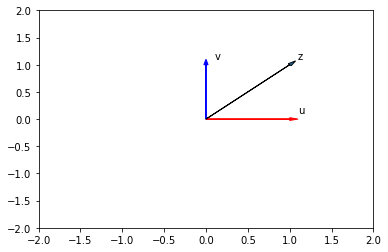

In [113]:
# Plot numpy arrays

Plotvec1(u, z, v)

Perform addition operation on the given numpy array arr1 and arr2:

In [114]:
arr1 = np.array([10, 11, 12, 13, 14, 15])
arr2 = np.array([20, 21, 22, 23, 24, 25])

# Enter your code here
arr3 = np.add(arr1, arr2)
arr3

array([30, 32, 34, 36, 38, 40])

Array Subtraction
Consider the numpy array a:

In [115]:
a = np.array([10, 20, 30])
a

array([10, 20, 30])

Consider the numpy array b:

In [116]:
b = np.array([5, 10, 15])
b

array([ 5, 10, 15])

Array Multiplication
Consider the vector numpy array y:

In [117]:
# Create a numpy array

x = np.array([1, 2])
x

array([1, 2])

In [118]:
# Create a numpy array

y = np.array([2, 1])
y

array([2, 1])

In [119]:
# Numpy Array Multiplication

z = np.multiply(x, y)
z

array([2, 2])

In [120]:
arr1 = np.array([10, 20, 30, 40, 50, 60])
arr2 = np.array([2, 1, 2, 3, 4, 5])

# Enter your code here

In [121]:
arr3 = np.multiply(arr1, arr2)
arr3

array([ 20,  20,  60, 120, 200, 300])

In [122]:
arr1 = np.array([10, 20, 30, 40, 50, 60])
arr2 = np.array([3, 5, 10, 8, 2, 33])

In [123]:
arr3 = np.divide(arr1, arr2)
arr3

array([ 3.33333333,  4.        ,  3.        ,  5.        , 25.        ,
        1.81818182])

<h3 id="dot">Dot Product</h3>


In [124]:
X = np.array([1, 2])
Y = np.array([3, 2])

In [125]:
# Calculate the dot product

np.dot(X, Y)

7

In [126]:
#Elements of X
print(X[0])
print(X[1])

1
2


In [127]:
#Elements of Y
print(Y[0])
print(Y[1])

3
2


We are performing the dot product which is shown as below

Image

In [128]:
arr1 = np.array([3, 5])
arr2 = np.array([2, 4])

# Enter your code here

In [129]:
arr3 = np.dot(arr1, arr2)
arr3

26

The process is summarised in the following animation:

Image

In [130]:
arr = np.array([1, 2, 3, -1]) 

# Enter your code here

In [131]:
arr + 5

array([6, 7, 8, 4])

Mathematical Functions

In [132]:
# The value of pi

np.pi

3.141592653589793

In [133]:
# Create the numpy array in radians

x = np.array([0, np.pi/2 , np.pi])

In [134]:
# Calculate the sin of each elements

y = np.sin(x)
y

array([0.0000000e+00, 1.0000000e+00, 1.2246468e-16])

Linspace
A useful function for plotting mathematical functions is linspace. Linspace returns evenly spaced numbers over a specified interval.

numpy.linspace(start, stop, num = int value)

start : start of interval range

stop : end of interval range

num : Number of samples to generate.

In [135]:
# Makeup a numpy array within [-2, 2] and 5 elements

np.linspace(-2, 2, num=5)

array([-2., -1.,  0.,  1.,  2.])

In [136]:
# Make a numpy array within [-2, 2] and 9 elements

np.linspace(-2, 2, num=9)

array([-2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ])

In [137]:
# Make a numpy array within [0, 2π] and 100 elements 

x = np.linspace(0, 2*np.pi, num=100)

In [138]:
# Calculate the sine of x list

y = np.sin(x)

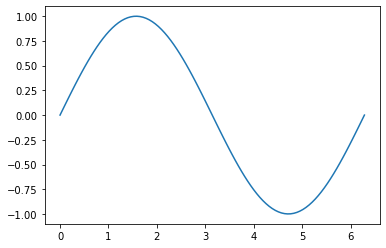

In [139]:
# Plot the result

plt.plot(x, y)

In [140]:
np.linspace(5, 4, num=6)

array([5. , 4.8, 4.6, 4.4, 4.2, 4. ])

In [141]:
# Write your code below and press Shift+Enter to execute

u = np.array([1, 0])
v = np.array([0, 1])

In [142]:
u - v

array([ 1, -1])

In [143]:
# Write your code below and press Shift+Enter to execute

z = np.array([2, 4])

Consider the list [1, 2, 3, 4, 5] and [1, 0, 1, 0, 1]. Cast both lists to a numpy array then multiply them together:

In [144]:
a = np.array([1, 2, 3, 4, 5])
b = np.array([1, 0, 1, 0, 1])
a * b

array([1, 0, 3, 0, 5])

In [145]:
# Import the libraries

import time 
import sys
import numpy as np 

import matplotlib.pyplot as plt
%matplotlib inline  

def Plotvec2(a,b):
    ax = plt.axes()# to generate the full window axes
    ax.arrow(0, 0, *a, head_width=0.05, color ='r', head_length=0.1)#Add an arrow to the  a Axes with arrow head width 0.05, color red and arrow head length 0.1
    plt.text(*(a + 0.1), 'a')
    ax.arrow(0, 0, *b, head_width=0.05, color ='b', head_length=0.1)#Add an arrow to the  b Axes with arrow head width 0.05, color blue and arrow head length 0.1
    plt.text(*(b + 0.1), 'b')
    plt.ylim(-2, 2)#set the ylim to bottom(-2), top(2)
    plt.xlim(-2, 2)#set the xlim to left(-2), right(2)

Convert the list [-1, 1] and [1, 1] to numpy arrays a and b. Then, plot the arrays as vectors using the fuction Plotvec2 and find their dot product:

The dot product is 0


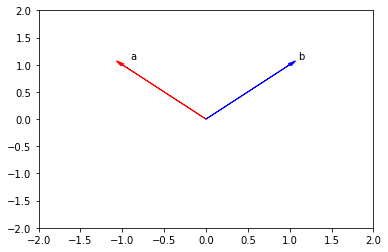

In [146]:

a = np.array([-1, 1])
b = np.array([1, 1])
Plotvec2(a, b)
print("The dot product is", np.dot(a,b))

Convert the list [1, 0] and [0, 1] to numpy arrays a and b. Then, plot the arrays as vectors using the function Plotvec2 and find their dot product:

The dot product is 0


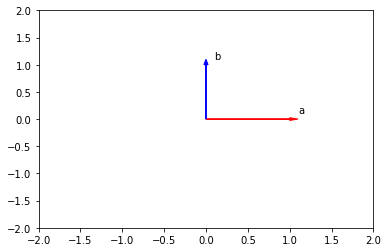

In [147]:
a = np.array([1, 0])
b = np.array([0, 1])
Plotvec2(a, b)
print("The dot product is", np.dot(a, b))

Convert the list [1, 1] and [0, 1] to numpy arrays a and b. Then plot the arrays as vectors using the fuction Plotvec2 and find their dot product:

The dot product is 1


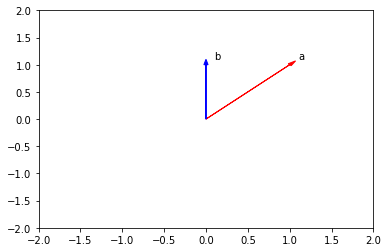

In [148]:
a = np.array([1, 1])
b = np.array([0, 1])
Plotvec2(a, b)
print("The dot product is", np.dot(a, b))

Why are the results of the dot product for [-1, 1] and [1, 1] and the dot product for [1, 0] and [0, 1] zero, but not zero for the dot product for [1, 1] and [0, 1]?

Hint: Study the corresponding figures, pay attention to the direction the arrows are pointing to.

In [149]:
arr1 = np.array([1, 2, 3])
arr2 = np.array([8, 9, 10])

arr3 = np.add(arr1, arr2)
arr3

arr4 = np.subtract(arr1, arr2)
arr4

arr5 = np.multiply(arr1, arr2)
arr5


arr6 = np.divide(arr1, arr2)
arr6

arr7 = np.dot(arr1, arr2)
arr7

56

Pandas is an API

In [150]:
def one_dict(list_dict):
    keys=list_dict[0].keys()
    out_dict={key:[] for key in keys}
    for dict_ in list_dict:
        for key, value in dict_.items():
            out_dict[key].append(value)
    return out_dict  

In [151]:
import pandas as pd
import matplotlib.pyplot as plt

In [152]:
dict_={'a':[11,21,31],'b':[12,22,32]}

In [153]:
df=pd.DataFrame(dict_)
type(df)

pandas.core.frame.DataFrame

pandas.core.frame.DataFrame
logistic regression block diagram
When you call the method head the dataframe communicates with the API displaying the first few rows of the dataframe.

In [154]:
df.head()

,a,b
0,11,12
1,21,22
2,31,32


In [155]:
df.mean()

a    21.0
b    22.0
dtype: float64

REST APIs
Rest API’s function by sending a request, the request is communicated via HTTP message. The HTTP message usually contains a JSON file. This contains instructions for what operation we would like the service or resource to perform. In a similar manner, API returns a response, via an HTTP message, this response is usually contained within a JSON.

In this lab, we will use the NBA API to determine how well the Golden State Warriors performed against the Toronto Raptors. We will use the API to determine the number of points the Golden State Warriors won or lost by for each game. So if the value is three, the Golden State Warriors won by three points. Similarly it the Golden State Warriors lost by two points the result will be negative two. The API will handle a lot of the details, such a Endpoints and Authentication

It's quite simple to use the nba api to make a request for a specific team. We don't require a JSON, all we require is an id. This information is stored locally in the API. We import the module teams

In [156]:
#https://pypi.org/project/nba-api/

Overview of HTTP 
When you, the client, use a web page your browser sends an HTTP request to the server where the page is hosted. The server tries to find the desired resource by default "index.html". If your request is successful, the server will send the object to the client in an HTTP response. This includes information like the type of the resource, the length of the resource, and other information.

The figure below represents the process. The circle on the left represents the client, the circle on the right represents the Web server. The table under the Web server represents a list of resources stored in the web server. In this case an HTML file, png image, and txt file .

The HTTP protocol allows you to send and receive information through the web including webpages, images, and other web resources. In this lab, we will provide an overview of the Requests library for interacting with the HTTP protocol.

Overview of HTTP 
When you, the client, use a web page your browser sends an HTTP request to the server where the page is hosted. The server tries to find the desired resource by default "index.html". If your request is successful, the server will send the object to the client in an HTTP response. This includes information like the type of the resource, the length of the resource, and other information.

The figure below represents the process. The circle on the left represents the client, the circle on the right represents the Web server. The table under the Web server represents a list of resources stored in the web server. In this case an HTML file, png image, and txt file .

The HTTP protocol allows you to send and receive information through the web including webpages, images, and other web resources. In this lab, we will provide an overview of the Requests library for interacting with the HTTP protocol.

Uniform Resource Locator: URL
Uniform resource locator (URL) is the most popular way to find resources on the web. We can break the URL into three parts.

scheme this is this protocol, for this lab it will always be http://
Internet address or Base URL this will be used to find the location here are some examples: www.ibm.com and  www.gitlab.com 
route location on the web server for example: /images/IDSNlogo.png
You may also hear the term Uniform Resource Identifier (URI), URL are actually a subset of URIs. Another popular term is endpoint, this is the URL of an operation provided by a Web server.

Request 
The process can be broken into the request and response process. The request using the get method is partially illustrated below. In the start line we have the GET method, this is an HTTP method. Also the location of the resource /index.html and the HTTP version. The Request header passes additional information with an HTTP request:

Image
When an HTTP request is made, an HTTP method is sent, this tells the server what action to perform. A list of several HTTP methods is shown below. We will go over more examples later.

Image
Response
The figure below represents the response; the response start line contains the version number HTTP/1.0, a status code (200) meaning success, followed by a descriptive phrase (OK). The response header contains useful information. Finally, we have the response body containing the requested file, an  HTML  document. It should be noted that some requests have headers.

Image
Some status code examples are shown in the table below, the prefix indicates the class. These are shown in yellow, with actual status codes shown in white. Check out the following link for more descriptions.

Image
Requests in Python
Requests is a Python Library that allows you to send HTTP/1.1 requests easily. We can import the library as follows: